Problem 1: Analyzing Trends in Game Performance

In [2]:
# Import Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

In [3]:
# Load and Preprocess the Dataset
try:
    df = pd.read_csv('games-data.csv')
    print("Dataset loaded successfully for Problem 1!")
except FileNotFoundError:
    print("Error: 'games-data.csv' not found. Please ensure the file is in the correct directory.")
    raise

df['user score'] = pd.to_numeric(df['user score'], errors='coerce')
df['user score'].fillna(df['user score'].median(), inplace=True)

df['r-date'] = pd.to_datetime(df['r-date'], errors='coerce')
df['release_year'] = df['r-date'].dt.year
df['release_year'].fillna(df['release_year'].mode()[0], inplace=True)
df['release_year'] = df['release_year'].astype(int)

df['players'].fillna(df['players'].mode()[0], inplace=True)

print("Dataset preprocessed for Problem 1.")
print(df.info())

Dataset loaded successfully for Problem 1!
Dataset preprocessed for Problem 1.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          17944 non-null  object        
 1   platform      17944 non-null  object        
 2   r-date        17944 non-null  datetime64[ns]
 3   score         17944 non-null  int64         
 4   user score    17944 non-null  float64       
 5   developer     17944 non-null  object        
 6   genre         17944 non-null  object        
 7   players       17944 non-null  object        
 8   critics       17944 non-null  int64         
 9   users         17944 non-null  int64         
 10  release_year  17944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.5+ MB
None


C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\3399155077.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user score'].fillna(df['user score'].median(), inplace=True)
C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\3399155077.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [4]:
# Data Aggregation for Overall Yearly Trends
yearly_avg_scores = df.groupby('release_year')[['score', 'user score']].mean().reset_index()
yearly_avg_scores = yearly_avg_scores[(yearly_avg_scores['release_year'] >= 1995) & (yearly_avg_scores['release_year'] <= 2024)]

print("Aggregated Yearly Average Scores (first 5 rows):")
print(yearly_avg_scores.head())

Aggregated Yearly Average Scores (first 5 rows):
   release_year      score  user score
0          1995  86.000000    8.600000
1          1996  85.450000    8.355000
2          1997  85.185185    8.459259
3          1998  82.466667    8.346667
4          1999  83.423077    8.453846


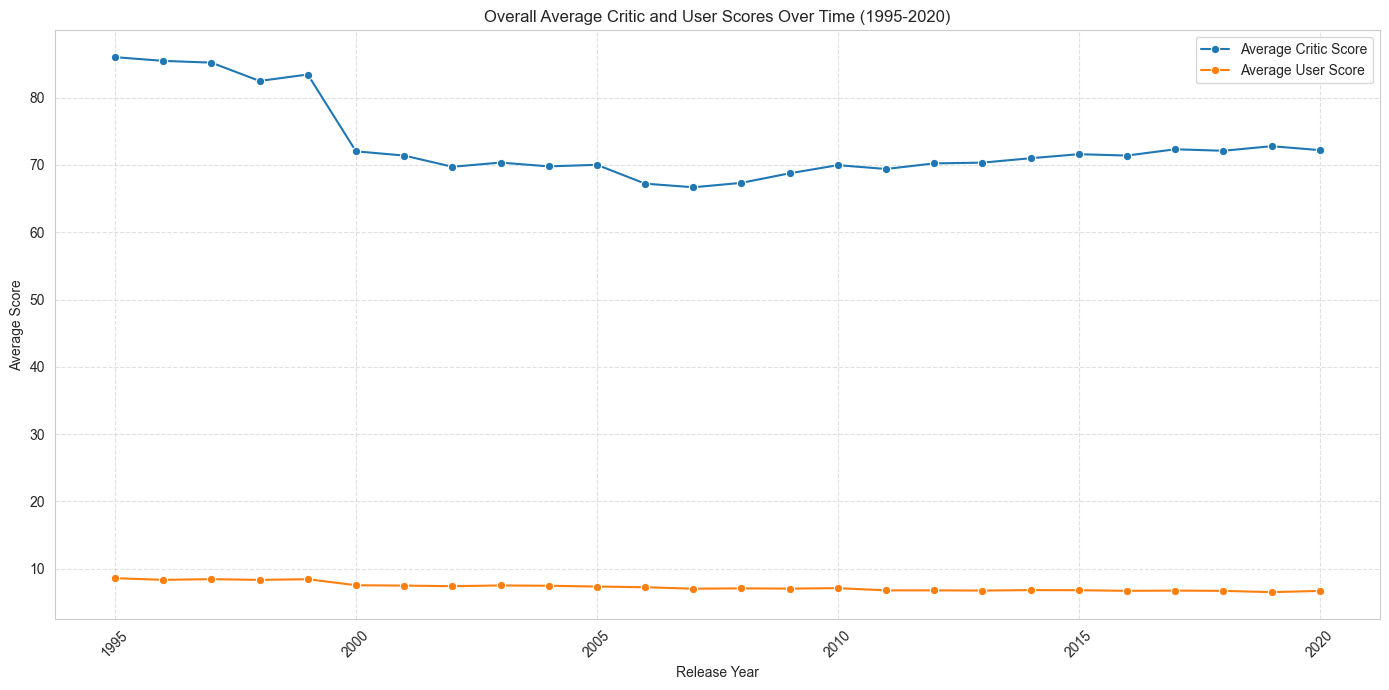

In [5]:
# Visualization of Overall Score Trends Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_avg_scores, x='release_year', y='score', label='Average Critic Score', marker='o')
sns.lineplot(data=yearly_avg_scores, x='release_year', y='user score', label='Average User Score', marker='o')

plt.title('Overall Average Critic and User Scores Over Time (1995-2020)')
plt.xlabel('Release Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
#  Aggregation for Platform-Specific Trends
top_platforms = df['platform'].value_counts().head(10).index
print(f"Top 10 Platforms: {list(top_platforms)}")

df_top_platforms = df[df['platform'].isin(top_platforms)]

platform_yearly_avg_scores = df_top_platforms.groupby(['release_year', 'platform'])[['score', 'user score']].mean().reset_index()
platform_yearly_avg_scores = platform_yearly_avg_scores[(platform_yearly_avg_scores['release_year'] >= 1995) & (platform_yearly_avg_scores['release_year'] <= 2024)]

print("Aggregated Platform-Yearly Average Scores (first 5 rows):")
print(platform_yearly_avg_scores.head())

Top 10 Platforms: ['PC', 'PlayStation4', 'Xbox360', 'PlayStation2', 'PlayStation3', 'Switch', 'XboxOne', 'Xbox', 'DS', 'Wii']
Aggregated Platform-Yearly Average Scores (first 5 rows):
   release_year platform      score  user score
0          1995       PC  86.000000    8.600000
1          1996       PC  83.363636    8.281818
2          1997       PC  82.727273    8.345455
3          1998       PC  82.600000    8.393333
4          1999       PC  85.000000    8.478571


In [7]:
# Aggregation for Genre-Specific Trends

# Splitting multiple genres per game for accurate genre-specific analysis
df_genres_exploded = df.assign(genre=df['genre'].str.split(',')).explode('genre')
df_genres_exploded['genre'] = df_genres_exploded['genre'].str.strip()

top_genres = df_genres_exploded['genre'].value_counts().head(10).index
print(f"Top 10 Genres: {list(top_genres)}")

df_top_genres = df_genres_exploded[df_genres_exploded['genre'].isin(top_genres)]

genre_yearly_avg_scores = df_top_genres.groupby(['release_year', 'genre'])[['score', 'user score']].mean().reset_index()
genre_yearly_avg_scores = genre_yearly_avg_scores[(genre_yearly_avg_scores['release_year'] >= 1995) & (genre_yearly_avg_scores['release_year'] <= 2024)]

print("Aggregated Genre-Yearly Average Scores (first 5 rows):")
print(genre_yearly_avg_scores.head())

Top 10 Genres: ['Action', 'General', 'Shooter', 'Action Adventure', 'Arcade', 'Platformer', 'Role-Playing', 'Sci-Fi', 'Miscellaneous', '3D']
Aggregated Genre-Yearly Average Scores (first 5 rows):
   release_year             genre  score  user score
0          1995           General   86.0        8.60
1          1996                3D   91.5        8.80
2          1996            Action   89.0        8.54
3          1996  Action Adventure   84.0        8.15
4          1996            Arcade   91.5        8.75


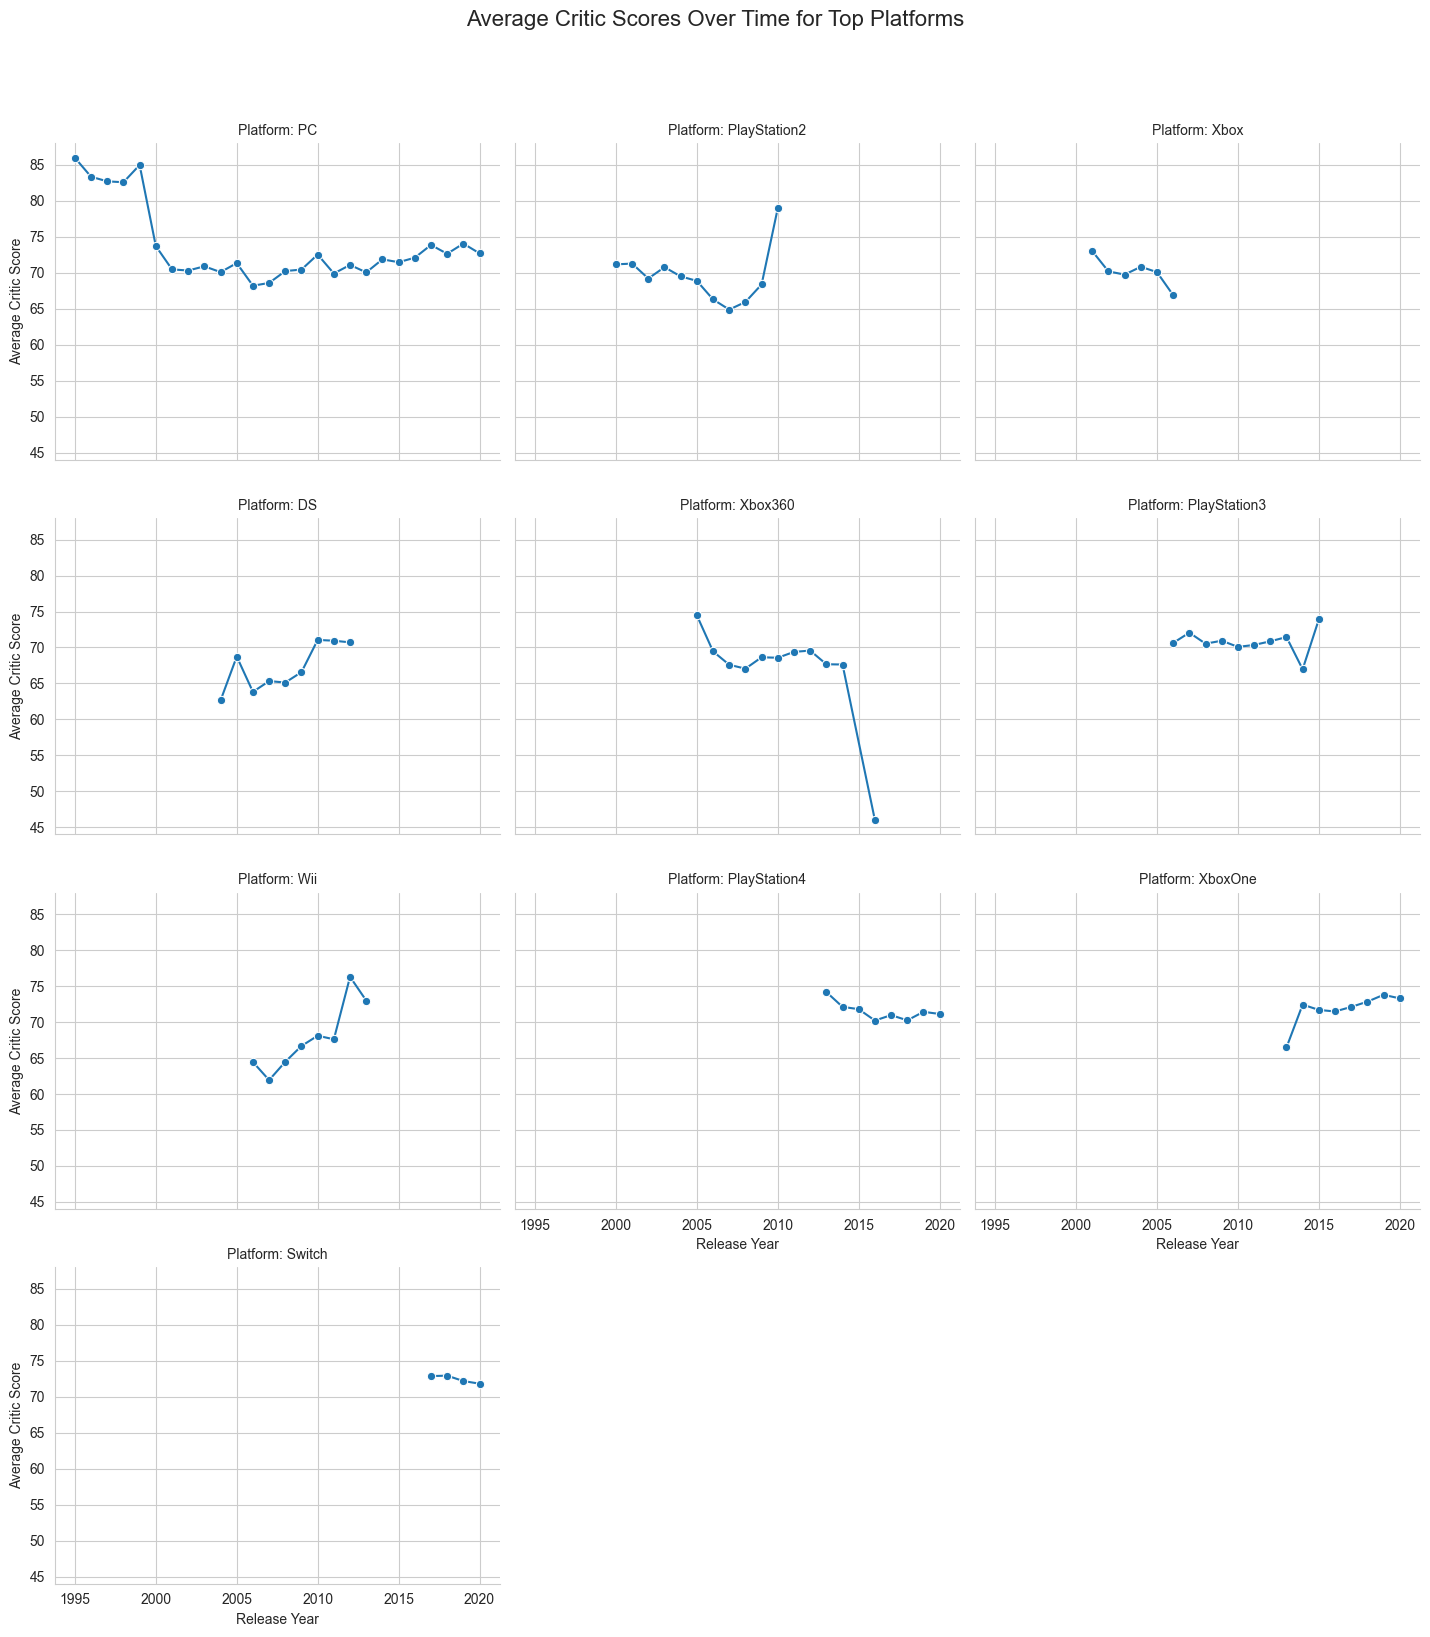

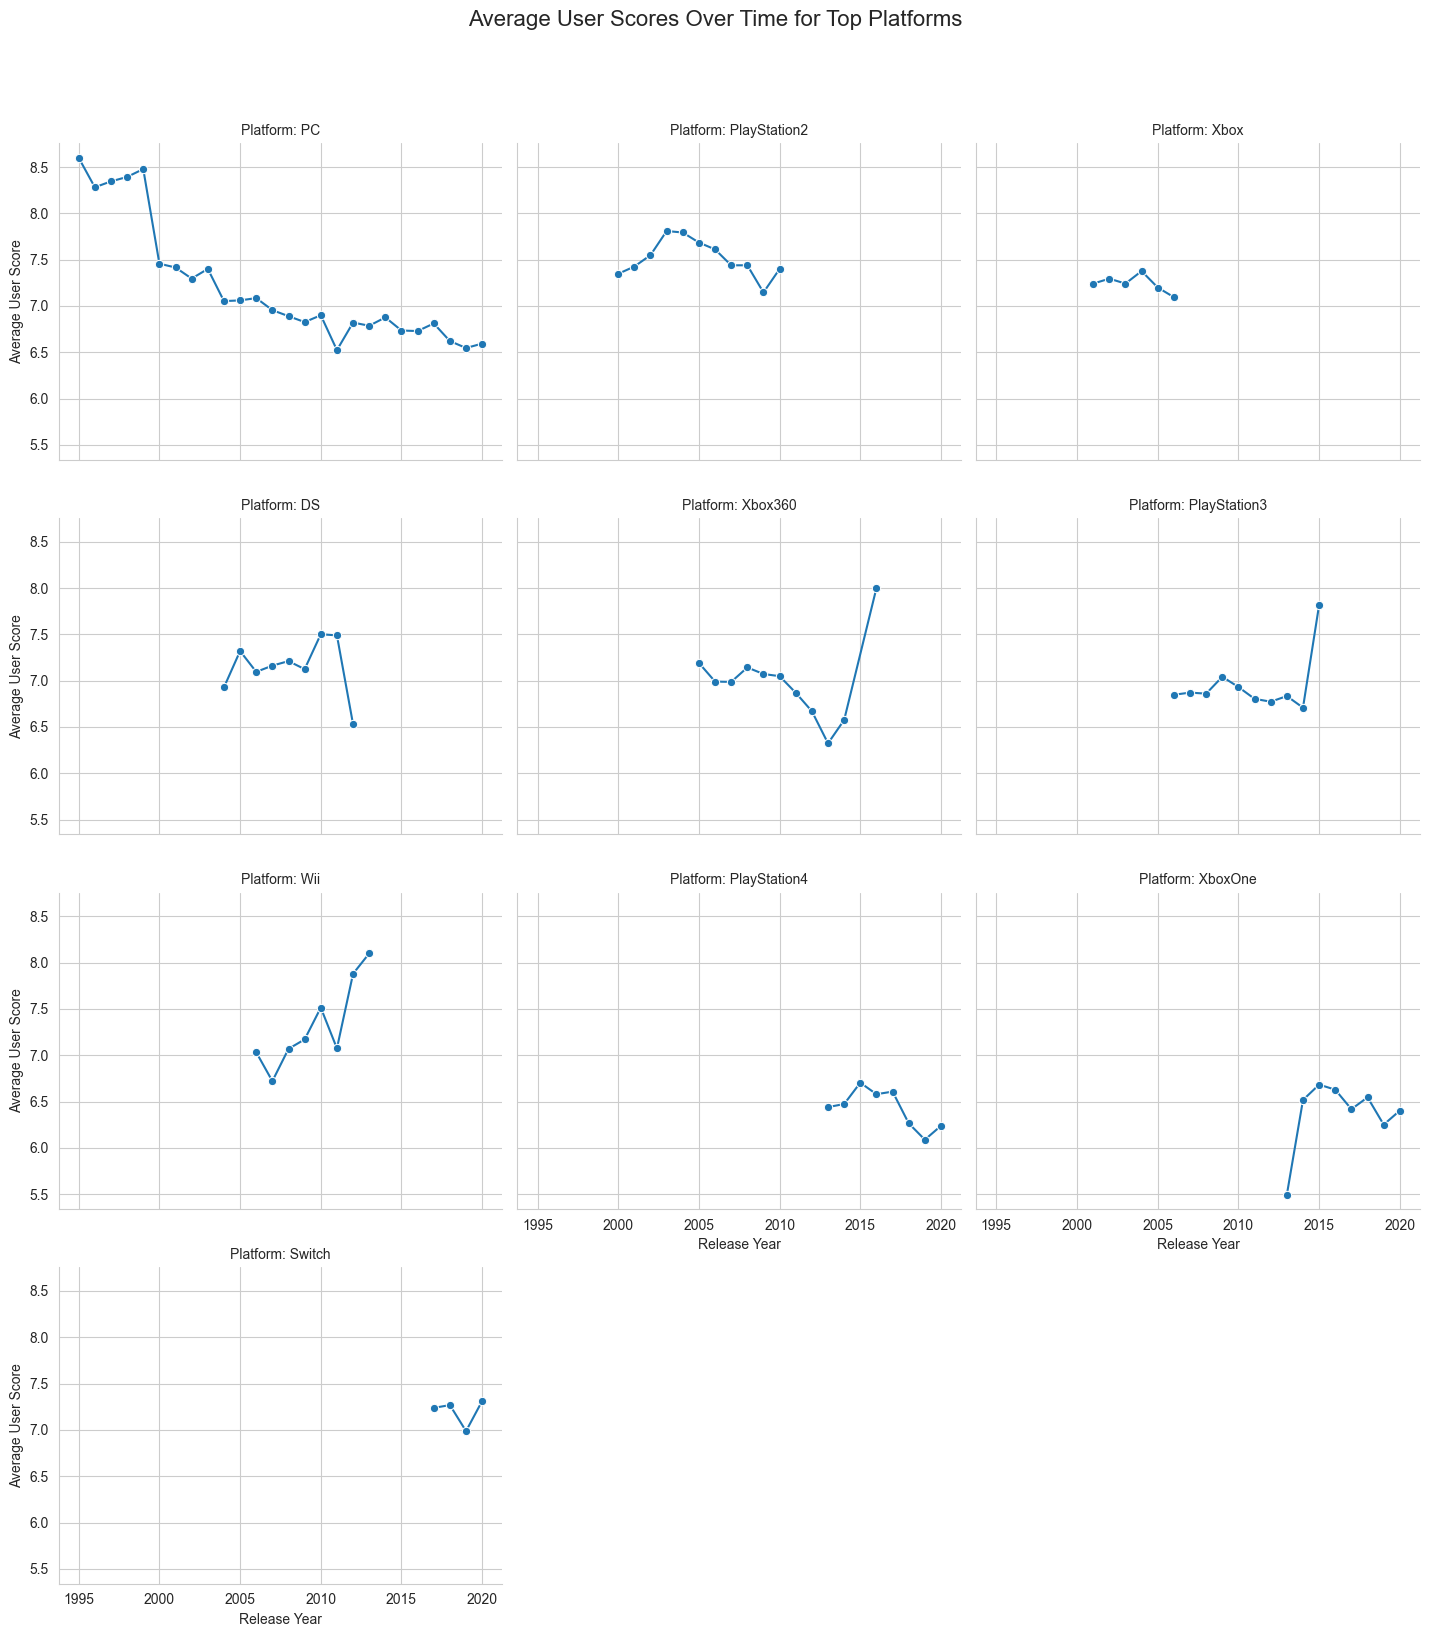

In [8]:
# Visualization of Platform-Specific Score Trends

# Visualize score trends for top platforms using a facet grid
# This allows comparing multiple platforms side-by-side efficiently

# Critic Score Trends by Platform
g_critic = sns.relplot(
    data=platform_yearly_avg_scores,
    x='release_year',
    y='score',
    col='platform',
    col_wrap=3, # Adjust to display 3 plots per row
    kind='line',
    marker='o',
    height=4, aspect=1.2,
    facet_kws={'sharey': True, 'sharex': True} # Keep y-axis scale consistent across plots
)
g_critic.set_axis_labels("Release Year", "Average Critic Score")
g_critic.set_titles("Platform: {col_name}")
g_critic.fig.suptitle('Average Critic Scores Over Time for Top Platforms', y=1.02, fontsize=16) # Adjust title position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

# User Score Trends by Platform
g_user = sns.relplot(
    data=platform_yearly_avg_scores,
    x='release_year',
    y='user score',
    col='platform',
    col_wrap=3,
    kind='line',
    marker='o',
    height=4, aspect=1.2,
    facet_kws={'sharey': True, 'sharex': True}
)
g_user.set_axis_labels("Release Year", "Average User Score")
g_user.set_titles("Platform: {col_name}")
g_user.fig.suptitle('Average User Scores Over Time for Top Platforms', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

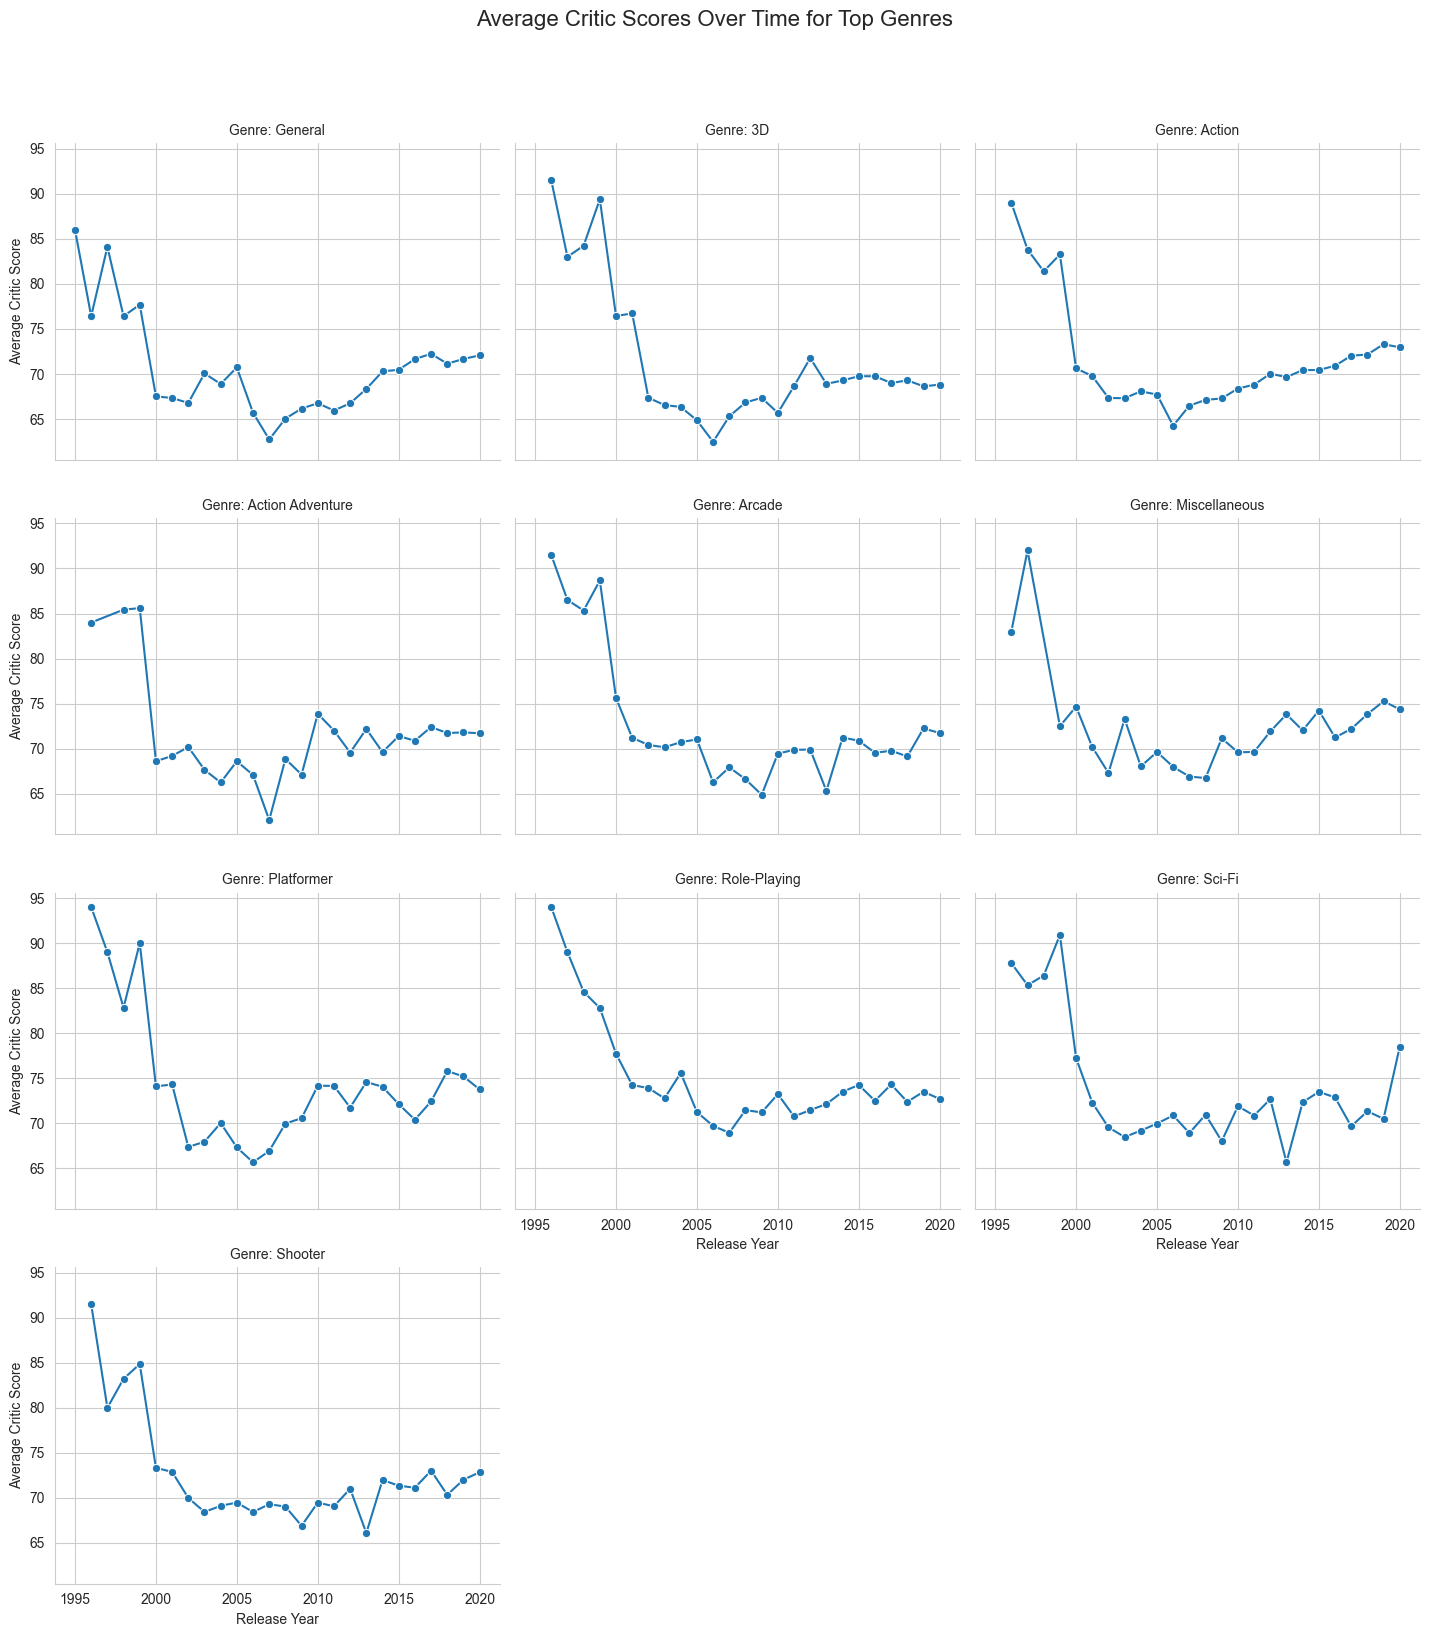

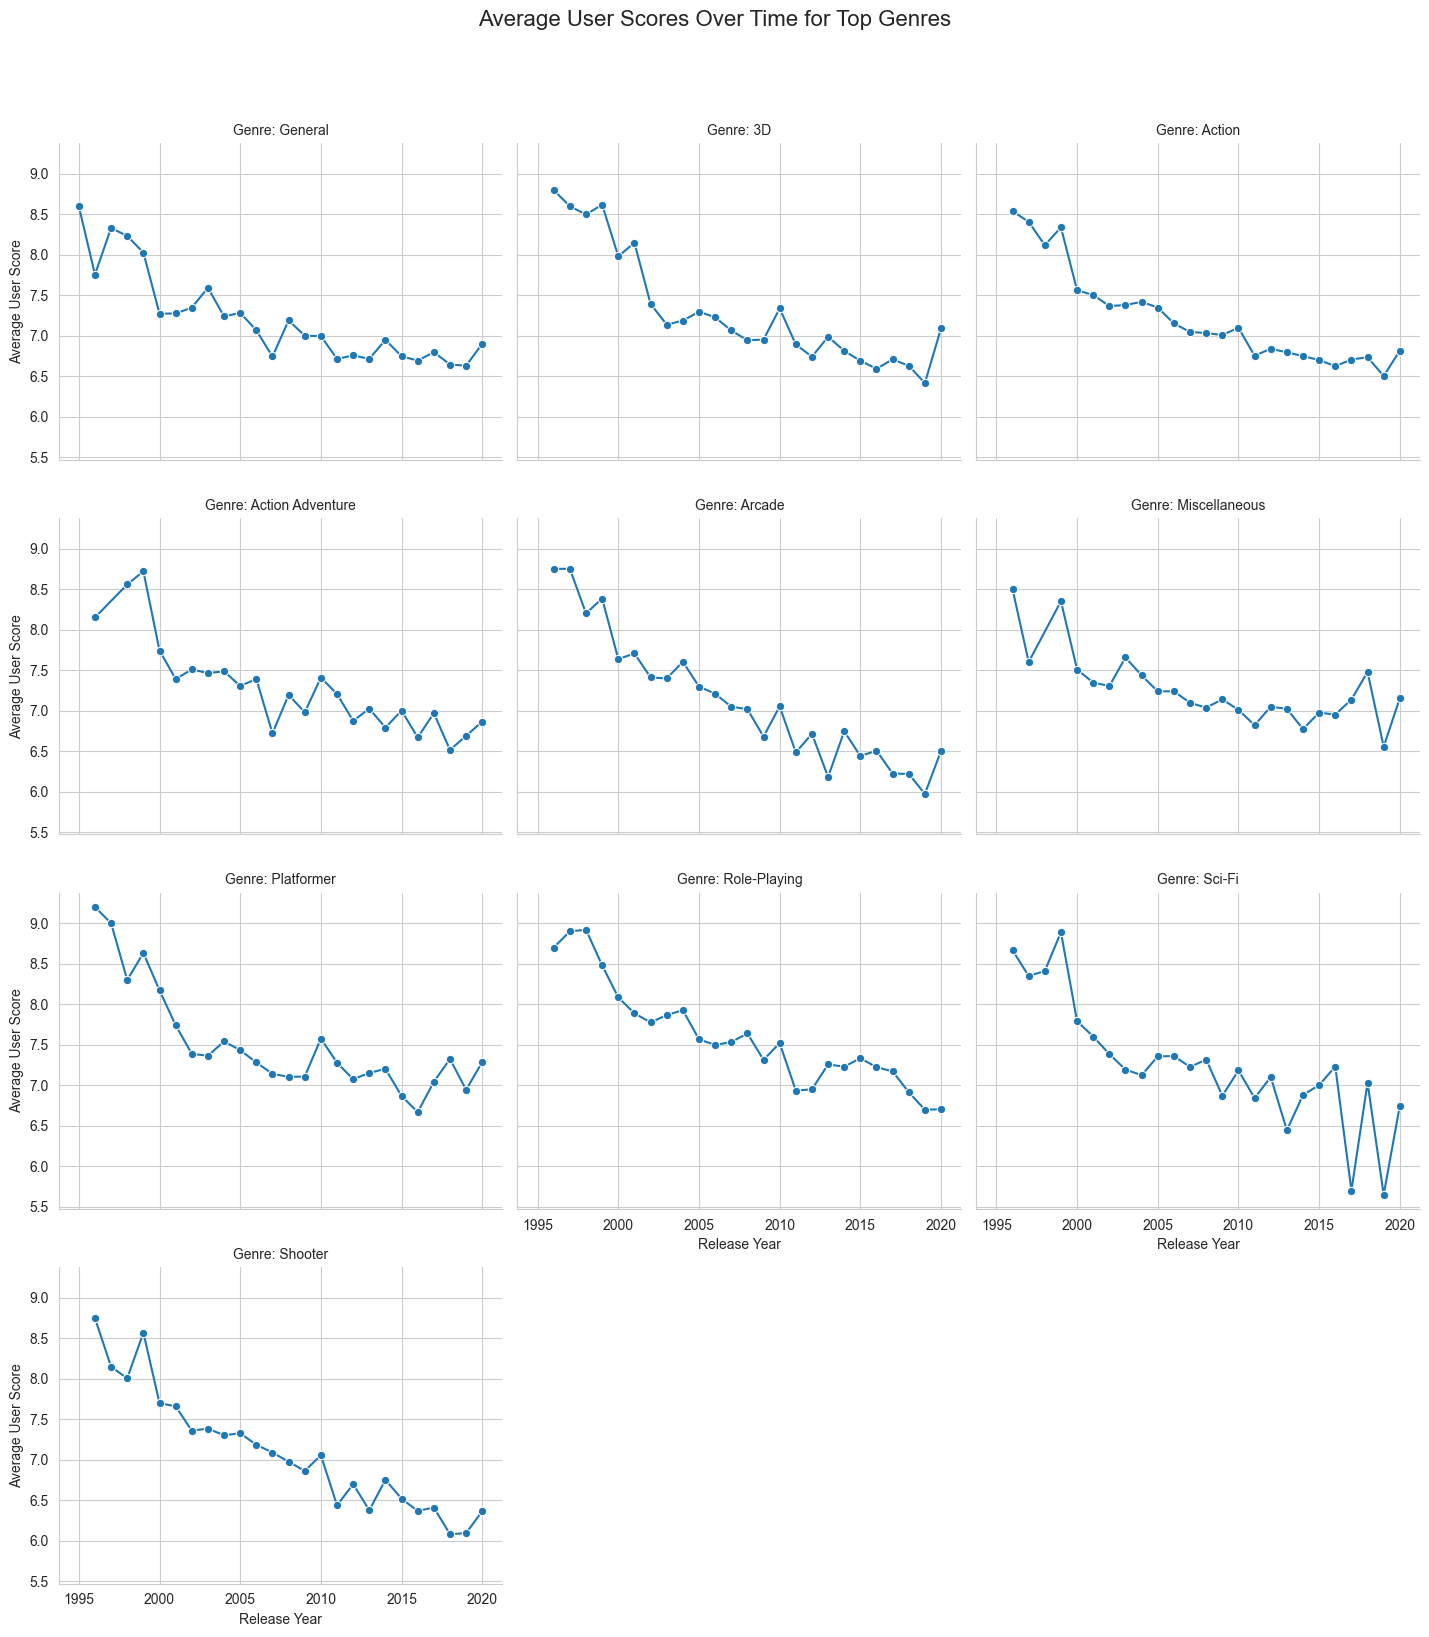

In [9]:
# Visualization of Genre-Specific Score Trends
# Visualize score trends for top genres using a facet grid

# Critic Score Trends by Genre
g_genre_critic = sns.relplot(
    data=genre_yearly_avg_scores,
    x='release_year',
    y='score',
    col='genre',
    col_wrap=3,
    kind='line',
    marker='o',
    height=4, aspect=1.2,
    facet_kws={'sharey': True, 'sharex': True}
)
g_genre_critic.set_axis_labels("Release Year", "Average Critic Score")
g_genre_critic.set_titles("Genre: {col_name}")
g_genre_critic.fig.suptitle('Average Critic Scores Over Time for Top Genres', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# User Score Trends by Genre
g_genre_user = sns.relplot(
    data=genre_yearly_avg_scores,
    x='release_year',
    y='user score',
    col='genre',
    col_wrap=3,
    kind='line',
    marker='o',
    height=4, aspect=1.2,
    facet_kws={'sharey': True, 'sharex': True}
)
g_genre_user.set_axis_labels("Release Year", "Average User Score")
g_genre_user.set_titles("Genre: {col_name}")
g_genre_user.fig.suptitle('Average User Scores Over Time for Top Genres', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

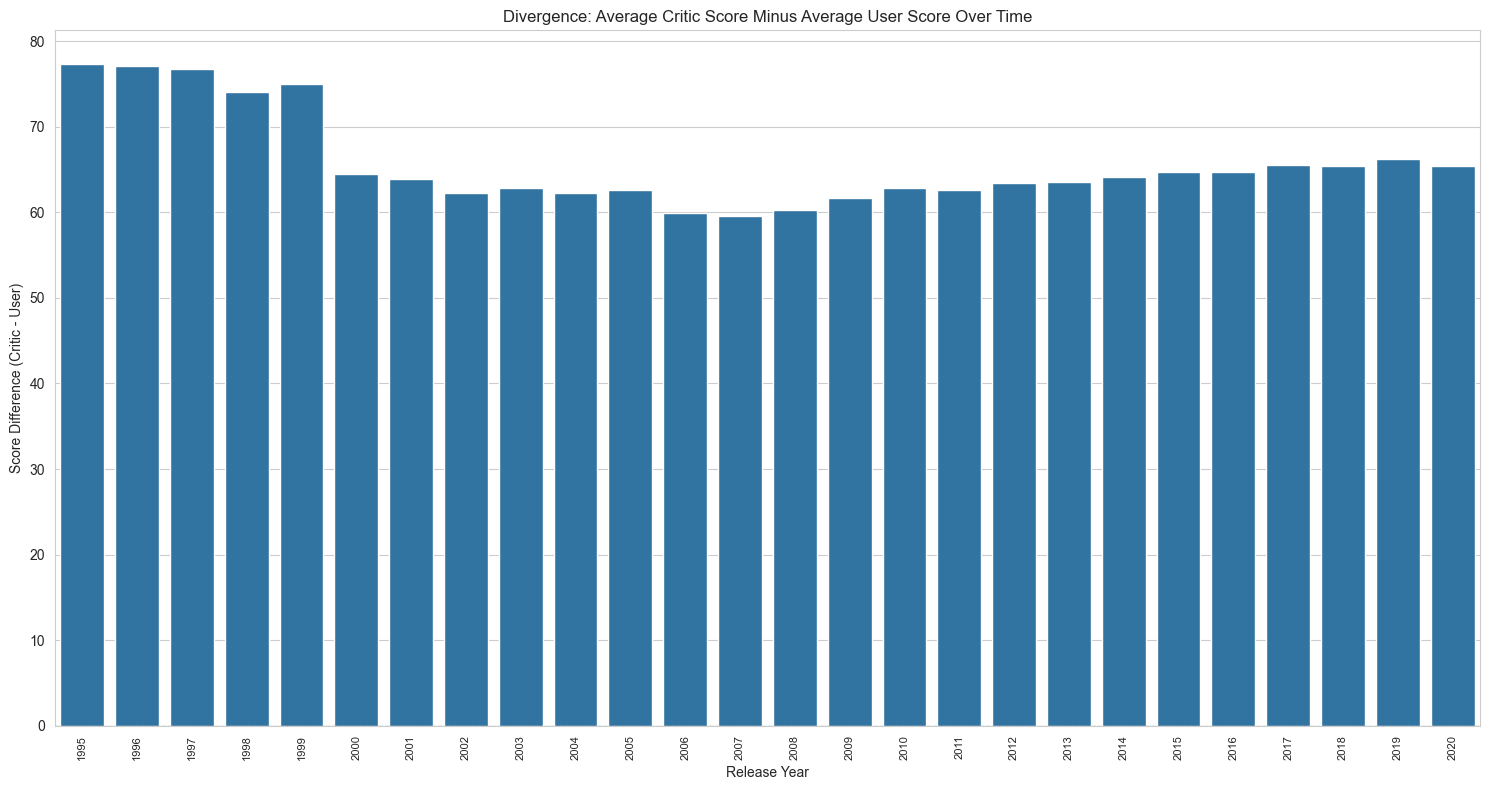

In [31]:
# Divergence Analysis (Bar Chart of Score Differences)

# Calculate the difference between Critic and User Scores
yearly_avg_scores['score_diff'] = yearly_avg_scores['score'] - yearly_avg_scores['user score']

plt.figure(figsize=(15, 8))
sns.barplot(data=yearly_avg_scores, x='release_year', y='score_diff')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8) 

plt.title('Divergence: Average Critic Score Minus Average User Score Over Time')
plt.xlabel('Release Year')
plt.ylabel('Score Difference (Critic - User)')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

Overall Pearson Correlation between Critic Score and User Score: 0.5045

Pearson Correlation (Critic vs. User Score) by Top Platform:
platform
Switch          0.619125
PlayStation3    0.617935
Xbox360         0.598389
Wii             0.596744
PC              0.538088
Xbox            0.534897
PlayStation2    0.522245
PlayStation4    0.503451
DS              0.502866
XboxOne         0.358582
Name: user score, dtype: float64


C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\2327914427.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_critic_user_corr.index, y=platform_critic_user_corr.values, palette='viridis')


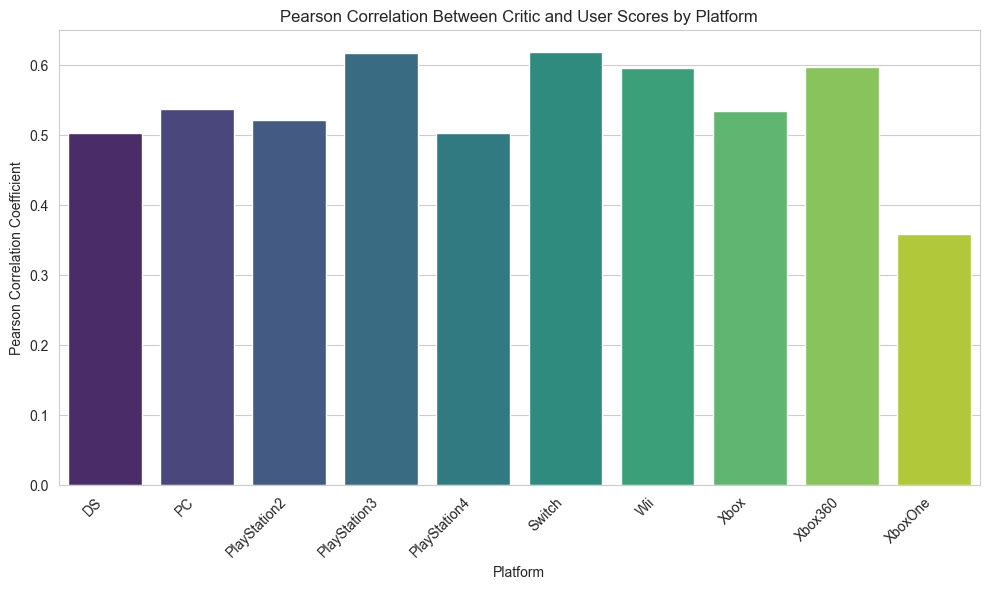

In [11]:
# Correlation Between Critic and User Scores (Overall & by Platform)

# Overall Pearson Correlation between Critic and User Scores
overall_correlation = df[['score', 'user score']].corr(method='pearson').loc['score', 'user score']
print(f"Overall Pearson Correlation between Critic Score and User Score: {overall_correlation:.4f}")

# Pearson Correlation by Platform for Top Platforms
platform_correlations = df_top_platforms.groupby('platform')[['score', 'user score']].corr(method='pearson')
platform_critic_user_corr = platform_correlations.loc[(slice(None), 'score'), 'user score'].reset_index(level=1, drop=True)

print("\nPearson Correlation (Critic vs. User Score) by Top Platform:")
print(platform_critic_user_corr.sort_values(ascending=False))

# Visualize these correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_critic_user_corr.index, y=platform_critic_user_corr.values, palette='viridis')
plt.title('Pearson Correlation Between Critic and User Scores by Platform')
plt.xlabel('Platform')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

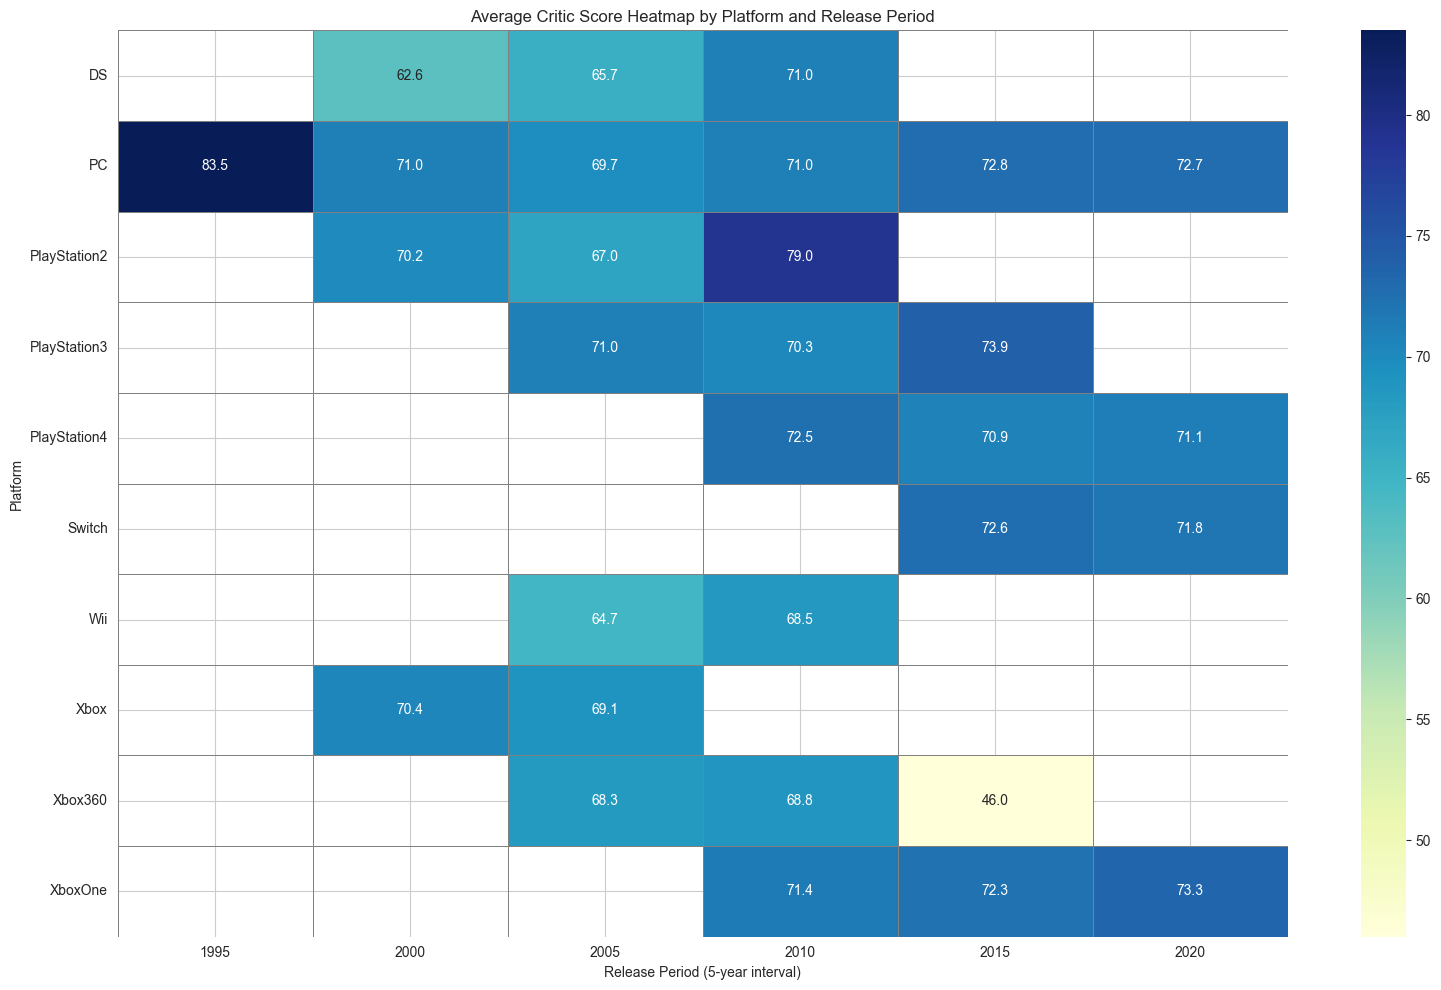

In [12]:
# Heatmap of Average Critic Scores by Platform and Binned Release Year

# To create a heatmap, we might want to bin years for better readability if too many years
df['release_decade'] = (df['release_year'] // 5) * 5 # Bin years into 5-year intervals

# Aggregate average critic score by platform and binned year
heatmap_data = df.pivot_table(
    values='score',
    index='platform',
    columns='release_decade',
    aggfunc='mean'
)

# Filter for top platforms
heatmap_data = heatmap_data[heatmap_data.index.isin(top_platforms)]

# Drop columns (years) with too many NaNs if specific platforms didn't exist then
heatmap_data = heatmap_data.dropna(axis=1, how='all')

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, linecolor='gray')
plt.title('Average Critic Score Heatmap by Platform and Release Period')
plt.xlabel('Release Period (5-year interval)')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

Problem 2: Identifying Key Factors Influencing User Engagement

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Load dataset (assuming 'games-data.csv' is in the correct directory)
try:
    df = pd.read_csv('games-data.csv')
    print("Dataset loaded successfully for Problem 2!")
except FileNotFoundError:
    print("Error: 'games-data.csv' not found. Please ensure the file is in the correct directory.")
    raise

# Preprocessing steps (re-apply for consistency within this problem's context)
df['user score'] = pd.to_numeric(df['user score'], errors='coerce')
df['user score'].fillna(df['user score'].median(), inplace=True)

df['r-date'] = pd.to_datetime(df['r-date'], errors='coerce')
df['release_year'] = df['r-date'].dt.year
df['release_year'].fillna(df['release_year'].mode()[0], inplace=True)
df['release_year'] = df['release_year'].astype(int)

df['players'].fillna(df['players'].mode()[0], inplace=True)

print("\nDataset preprocessed for Problem 2.")
print(df.info())

Dataset loaded successfully for Problem 2!

Dataset preprocessed for Problem 2.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          17944 non-null  object        
 1   platform      17944 non-null  object        
 2   r-date        17944 non-null  datetime64[ns]
 3   score         17944 non-null  int64         
 4   user score    17944 non-null  float64       
 5   developer     17944 non-null  object        
 6   genre         17944 non-null  object        
 7   players       17944 non-null  object        
 8   critics       17944 non-null  int64         
 9   users         17944 non-null  int64         
 10  release_year  17944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.5+ MB
None


C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\621782064.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user score'].fillna(df['user score'].median(), inplace=True)
C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\621782064.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

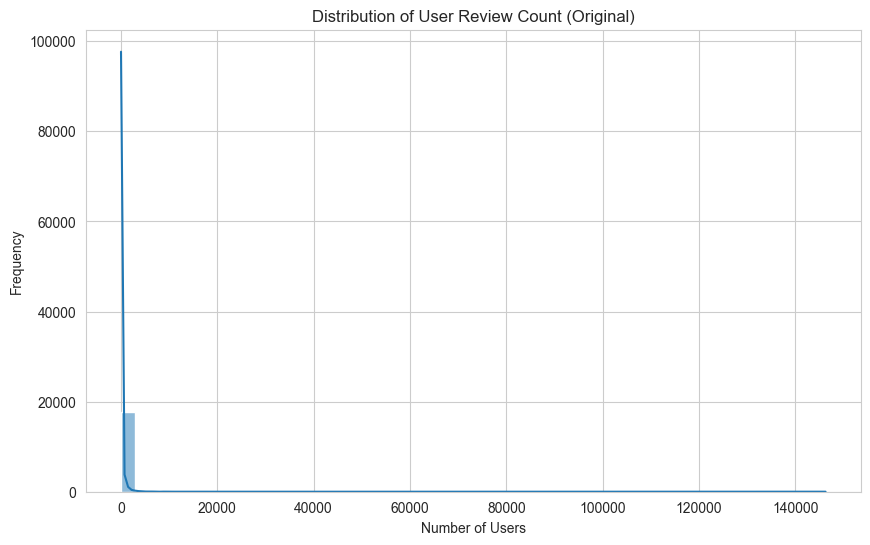

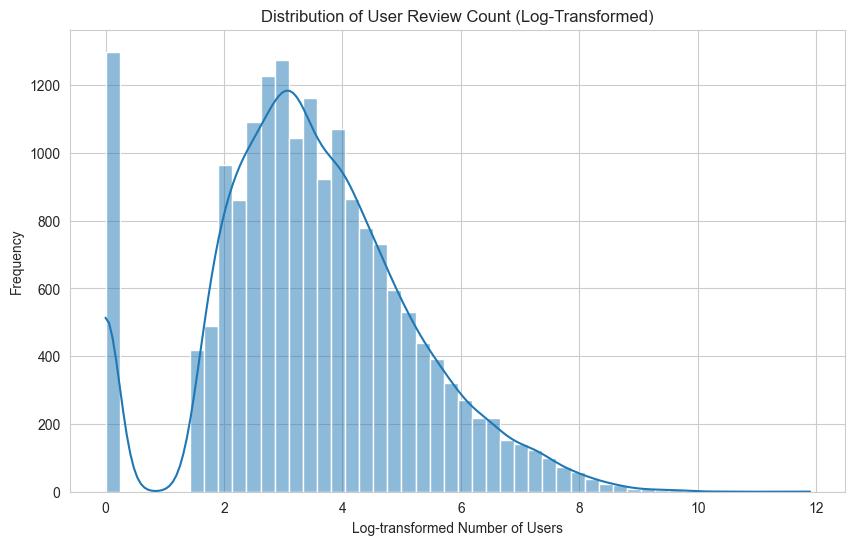


'users' column transformed using np.log1p().
   users  users_transformed
0   5749           8.656955
1    647           6.473891
2   3806           8.244597
3    324           5.783825
4   3364           8.121183


In [14]:
# Data Transformation - Handling Skewness in 'users'

# Analyze the distribution of 'users' count
plt.figure(figsize=(10, 6))
sns.histplot(df['users'], bins=50, kde=True)
plt.title('Distribution of User Review Count (Original)')
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.show()

# The 'users' column is highly skewed (as seen from df.describe() and the histogram).
# Apply a log transformation (using log1p to handle 0 values gracefully) to normalize it.
df['users_transformed'] = np.log1p(df['users'])

plt.figure(figsize=(10, 6))
sns.histplot(df['users_transformed'], bins=50, kde=True)
plt.title('Distribution of User Review Count (Log-Transformed)')
plt.xlabel('Log-transformed Number of Users')
plt.ylabel('Frequency')
plt.show()

print("\n'users' column transformed using np.log1p().")
print(df[['users', 'users_transformed']].head())

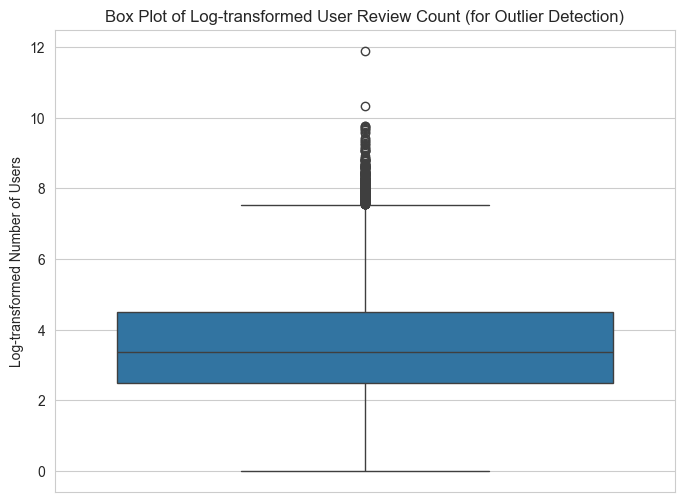

Q1 (25th percentile): 2.4849
Q3 (75th percentile): 4.5109
IQR (Interquartile Range): 2.0260
Lower Bound for Outliers: -0.5540
Upper Bound for Outliers: 7.5498
Number of identified outliers: 266

First 5 identified outliers:
                                   name      platform  users  \
0  The Legend of Zelda: Ocarina of Time    Nintendo64   5749   
2                   Grand Theft Auto IV  PlayStation3   3806   
4                   Grand Theft Auto IV       Xbox360   3364   
5                    Super Mario Galaxy           Wii   3059   
6                  Super Mario Galaxy 2           Wii   2521   

   users_transformed  score  
0           8.656955     99  
2           8.244597     98  
4           8.121183     98  
5           8.026170     97  
6           7.832808     97  


In [15]:
# Outlier Detection - Tukey Method (Box Plot) for 'users_transformed'

# Visualize outliers in 'users_transformed' using a box plot (Tukey Method)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['users_transformed'])
plt.title('Box Plot of Log-transformed User Review Count (for Outlier Detection)')
plt.ylabel('Log-transformed Number of Users')
plt.show()

# Calculate Q1, Q3, and IQR for outlier detection
Q1 = df['users_transformed'].quantile(0.25)
Q3 = df['users_transformed'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['users_transformed'] < lower_bound) | (df['users_transformed'] > upper_bound)]

print(f"Q1 (25th percentile): {Q1:.4f}")
print(f"Q3 (75th percentile): {Q3:.4f}")
print(f"IQR (Interquartile Range): {IQR:.4f}")
print(f"Lower Bound for Outliers: {lower_bound:.4f}")
print(f"Upper Bound for Outliers: {upper_bound:.4f}")
print(f"Number of identified outliers: {len(outliers)}")

if len(outliers) > 0:
    print("\nFirst 5 identified outliers:")
    print(outliers[['name', 'platform', 'users', 'users_transformed', 'score']].head())
    # You can choose to analyze or remove these outliers based on your project's needs.
else:
    print("\nNo outliers detected using the Tukey method for 'users_transformed'.")

In [16]:
# Correlation Analysis - Pearson Correlation Matrix

# Select numerical features for correlation analysis, including the transformed 'users'
numerical_features_for_corr = ['score', 'user score', 'critics', 'users_transformed']
correlation_matrix = df[numerical_features_for_corr].corr(method='pearson')

print("Pearson Correlation Matrix:")
print(correlation_matrix)

Pearson Correlation Matrix:
                      score  user score   critics  users_transformed
score              1.000000    0.504536  0.306712           0.423134
user score         0.504536    1.000000  0.183534           0.108166
critics            0.306712    0.183534  1.000000           0.573832
users_transformed  0.423134    0.108166  0.573832           1.000000


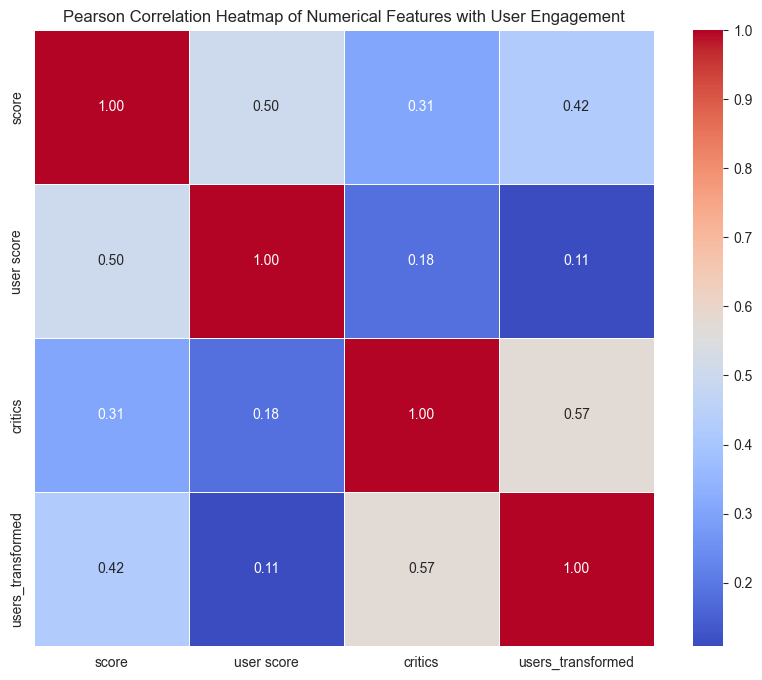

In [17]:
# Visualization - Heatmap of Pearson Correlations

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap of Numerical Features with User Engagement')
plt.show()

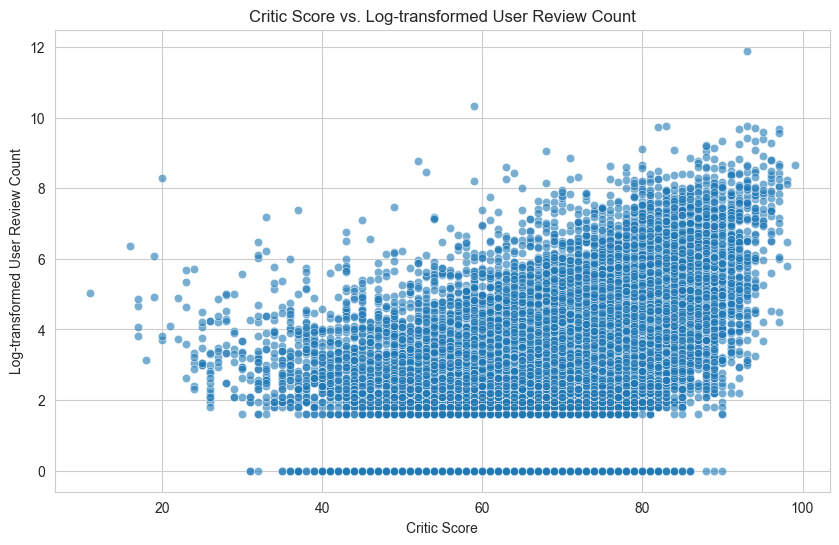

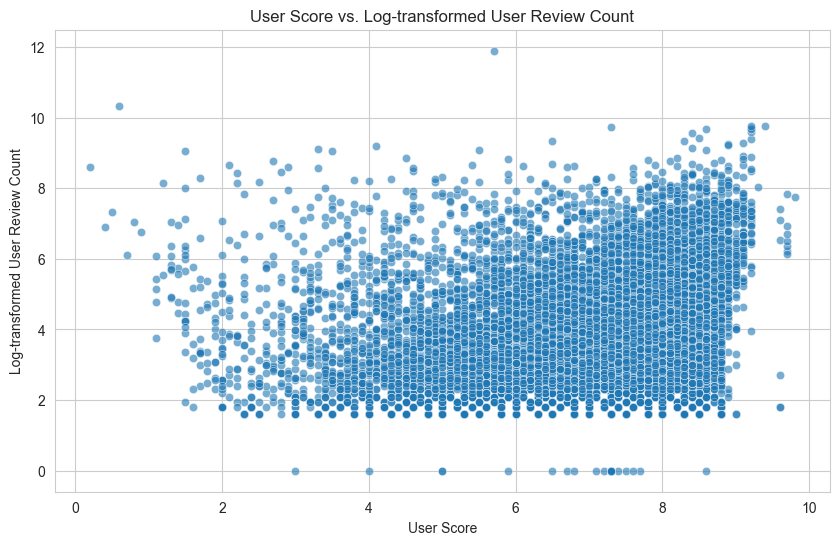

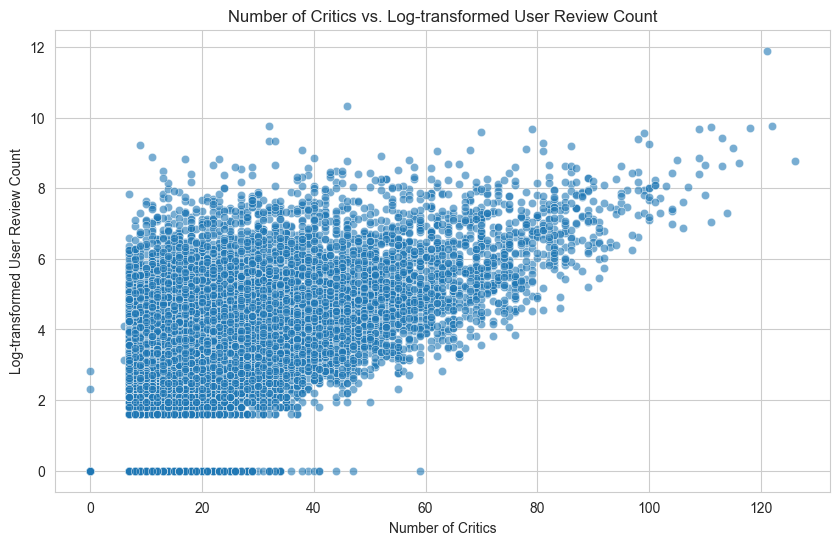

In [18]:
# Visualization - Scatter Plots for Key Relationships

# Scatter plot: Transformed Users vs. Critic Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score', y='users_transformed', alpha=0.6)
plt.title('Critic Score vs. Log-transformed User Review Count')
plt.xlabel('Critic Score')
plt.ylabel('Log-transformed User Review Count')
plt.show()

# Scatter plot: Transformed Users vs. User Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='user score', y='users_transformed', alpha=0.6)
plt.title('User Score vs. Log-transformed User Review Count')
plt.xlabel('User Score')
plt.ylabel('Log-transformed User Review Count')
plt.show()

# Scatter plot: Transformed Users vs. Critics (number of critics)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='critics', y='users_transformed', alpha=0.6)
plt.title('Number of Critics vs. Log-transformed User Review Count')
plt.xlabel('Number of Critics')
plt.ylabel('Log-transformed User Review Count')
plt.show()

C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\1465919944.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_platforms, x='platform', y='users_transformed', palette='viridis')


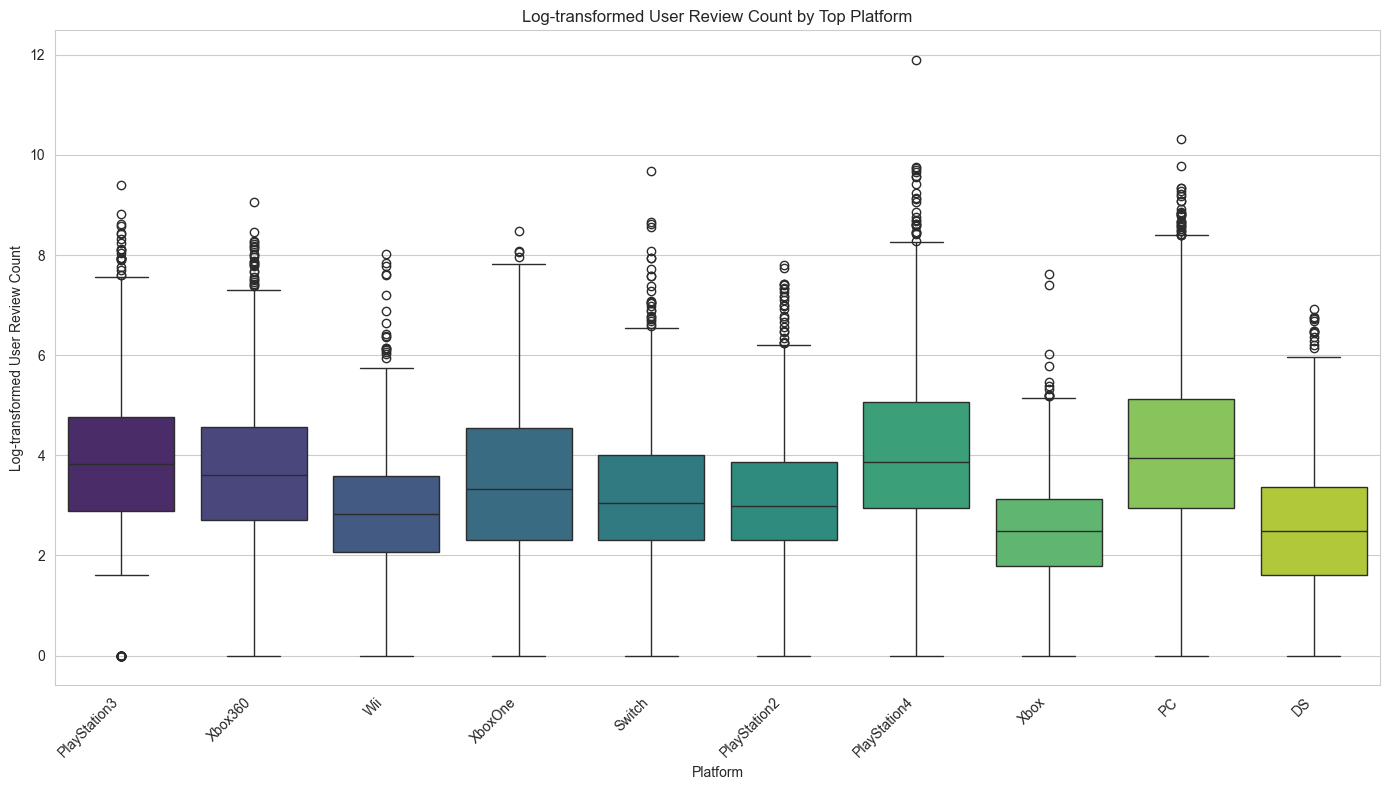

C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\1465919944.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_genres, x='genre', y='users_transformed', palette='plasma')


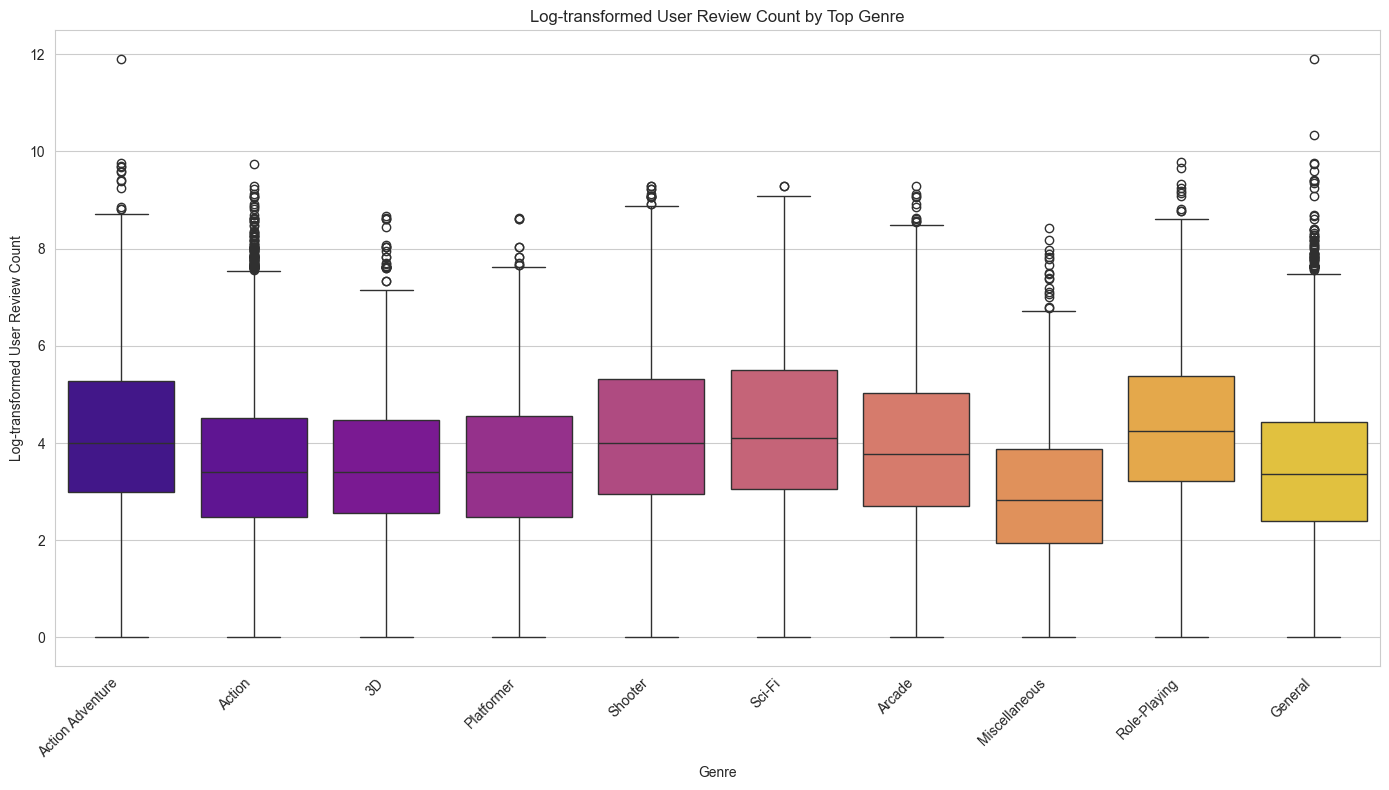

In [19]:
# Visualization - Box Plots for Categorical Features vs. User Engagement
top_platforms = df['platform'].value_counts().head(10).index
df_top_platforms = df[df['platform'].isin(top_platforms)].copy()

# Re-create df_top_genres (using the exploded genre approach)
df_genres_exploded = df.assign(genre=df['genre'].str.split(',')).explode('genre')
df_genres_exploded['genre'] = df_genres_exploded['genre'].str.strip()
top_genres = df_genres_exploded['genre'].value_counts().head(10).index
df_top_genres = df_genres_exploded[df_genres_exploded['genre'].isin(top_genres)].copy() 

# Box plot: Platform vs. Log-transformed User Review Count (for top platforms)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_platforms, x='platform', y='users_transformed', palette='viridis')
plt.title('Log-transformed User Review Count by Top Platform')
plt.xlabel('Platform')
plt.ylabel('Log-transformed User Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot: Genre vs. Log-transformed User Review Count (for top genres)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_genres, x='genre', y='users_transformed', palette='plasma')
plt.title('Log-transformed User Review Count by Top Genre')
plt.xlabel('Genre')
plt.ylabel('Log-transformed User Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Prepare Data for Regression Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features for regression model
features_for_regression = ['platform', 'developer', 'genre', 'score', 'user score', 'critics', 'release_year']
X_reg = df[features_for_regression]
y_reg = df['users_transformed']

# Identify categorical and numerical features
categorical_features_reg = ['platform', 'developer', 'genre']
numerical_features_reg = ['score', 'user score', 'critics', 'release_year']

# Create a preprocessor to handle categorical features 
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_reg),
        ('num', 'passthrough', numerical_features_reg)
    ])

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("Data prepared for regression model.")
print(f"Training features shape: {X_train_reg.shape}")
print(f"Test features shape: {X_test_reg.shape}")

Data prepared for regression model.
Training features shape: (14355, 7)
Test features shape: (3589, 7)


In [21]:
# Build and Train a Regression Model (Decision Tree Regressor)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

print("Training the Decision Tree Regression model...")
regression_pipeline.fit(X_train_reg, y_train_reg)
print("Model training complete.")

# Predict on the test set
y_pred_reg = regression_pipeline.predict(X_test_reg)

Training the Decision Tree Regression model...
Model training complete.



Regression Model Evaluation:
Mean Squared Error (MSE): 1.1223
Root Mean Squared Error (RMSE): 1.0594
R-squared (R2): 0.6250

Top 10 Key Factors (Feature Importances) Influencing User Engagement:
num__critics                      0.332422
num__user score                   0.202539
num__score                        0.133085
num__release_year                 0.092974
cat__platform_PC                  0.051935
cat__platform_Xbox                0.004953
cat__platform_PlayStation4        0.002966
cat__platform_PlayStation3        0.002419
cat__developer_Capcom             0.002091
cat__developer_UbisoftMontreal    0.002048
dtype: float64


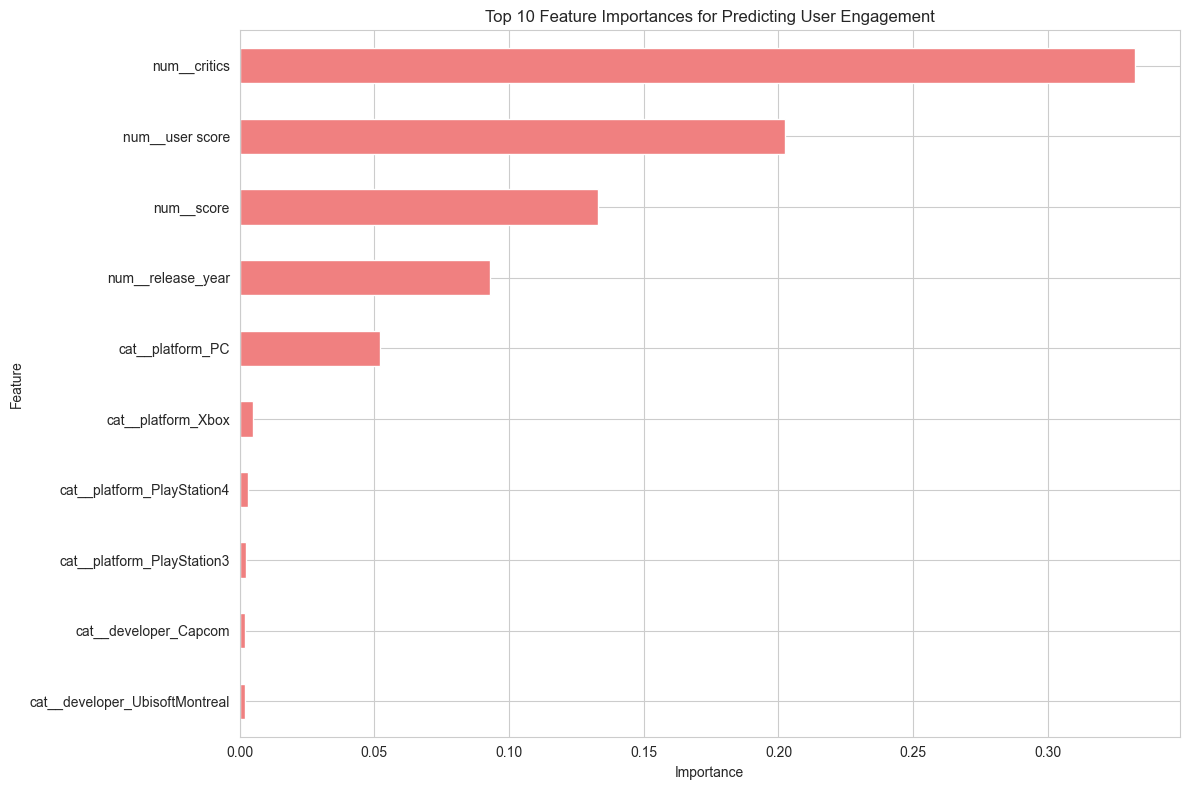

Features with higher importance scores are considered more influential in the model's predictions.


In [22]:
# Evaluate the Regression Model and Identify Key Factors

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nRegression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Identify Feature Importances to find Key Factors
# Get the trained regressor from the pipeline
regressor = regression_pipeline.named_steps['regressor']

# Get feature names after one-hot encoding
# This requires fitting the preprocessor on training data first to get all column names
encoded_feature_names = regression_pipeline.named_steps['preprocessor'].get_feature_names_out(features_for_regression)
feature_importances = pd.Series(regressor.feature_importances_, index=encoded_feature_names)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("\nTop 10 Key Factors (Feature Importances) Influencing User Engagement:")
print(feature_importances_sorted.head(10))

# Visualize Feature Importances
plt.figure(figsize=(12, 8))
feature_importances_sorted.head(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Feature Importances for Predicting User Engagement')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Features with higher importance scores are considered more influential in the model's predictions.")

Problem 3: Predicting Game Success (High Critic Score) Using Machine Learning

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Load dataset
df = pd.read_csv("games-data.csv")
print("Dataset loaded.")


Dataset loaded.


In [24]:
# Convert release date to year
df['r-date'] = pd.to_datetime(df['r-date'], errors='coerce')
df['release_year'] = df['r-date'].dt.year
df['release_year'].fillna(df['release_year'].mode()[0], inplace=True)
df['release_year'] = df['release_year'].astype(int)

# Fill missing categorical fields
df['players'].fillna(df['players'].mode()[0], inplace=True)

# Drop rows with missing target
df = df.dropna(subset=['score'])

# Create binary target label
df['high_score'] = (df['score'] >= 80).astype(int)
print("Target label created. Value counts:\n", df['high_score'].value_counts())


Target label created. Value counts:
 high_score
0    13505
1     4439
Name: count, dtype: int64


C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\1708643375.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_year'].fillna(df['release_year'].mode()[0], inplace=True)
C:\Users\Hieu\AppData\Local\Temp\ipykernel_23208\1708643375.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [25]:
# Use only pre-release features
features = ['platform', 'developer', 'genre', 'release_year']
target = 'high_score'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Split done. Shapes:")
print("Train:", X_train.shape)
print("Test:", X_test.shape)


Split done. Shapes:
Train: (14355, 4)
Test: (3589, 4)


In [26]:
categorical_features = ['platform', 'developer', 'genre']
numerical_features = ['release_year']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numerical_features)
])


In [27]:
classification_pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])

classification_pipeline_lr.fit(X_train, y_train)
print("Logistic Regression model trained.")


Logistic Regression model trained.


In [28]:
classification_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

classification_pipeline_rf.fit(X_train, y_train)
print("Random Forest model trained.")


Random Forest model trained.



--- Logistic Regression ---
Accuracy:  0.7707
Precision: 0.6484
Recall:    0.1599
F1-score:  0.2565


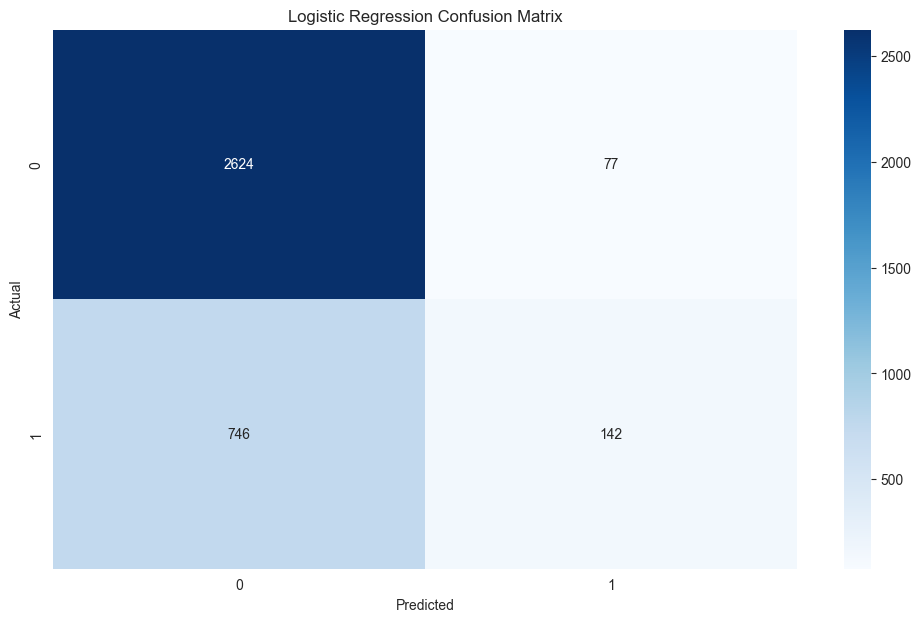


--- Random Forest ---
Accuracy:  0.8072
Precision: 0.6684
Recall:    0.4381
F1-score:  0.5293


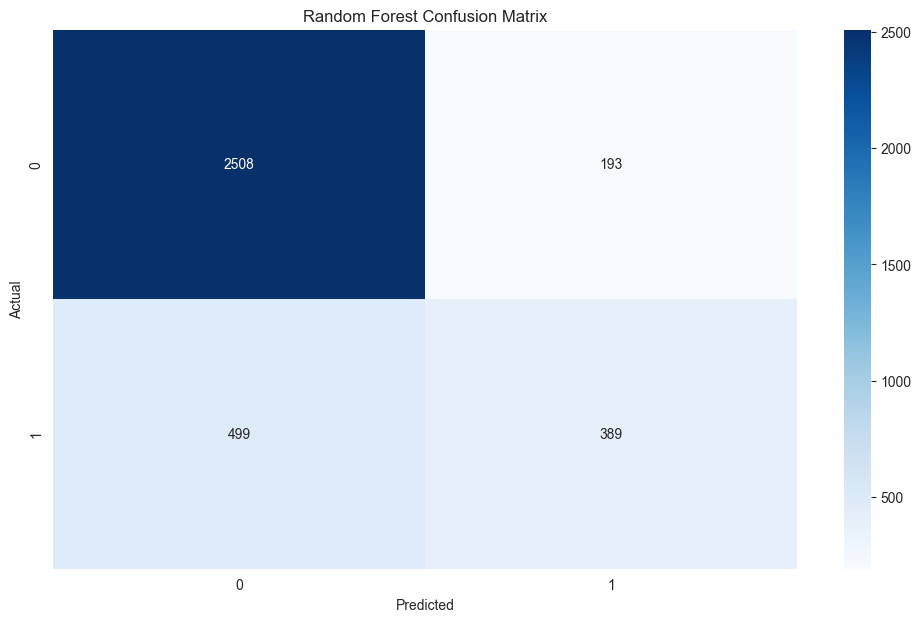

In [29]:
def evaluate(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.4f}")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both
y_pred_lr = classification_pipeline_lr.predict(X_test)
y_pred_rf = classification_pipeline_rf.predict(X_test)

evaluate("Logistic Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)


In [30]:
custom_game = pd.DataFrame([{
    'platform': 'PC',
    'developer': 'CDProjekt',
    'genre': 'RPG',
    'release_year': 2020
}])

pred_lr = classification_pipeline_lr.predict(custom_game)[0]
pred_rf = classification_pipeline_rf.predict(custom_game)[0]

print("Logistic Regression prediction:", "High Score" if pred_lr == 1 else "Low Score")
print("Random Forest prediction:", "High Score" if pred_rf == 1 else "Low Score")


Logistic Regression prediction: Low Score
Random Forest prediction: Low Score
